***1. Importing Libraries and Dataset***

In [1]:
%pip install pandas
%pip install -U scikit-learn
import pandas as pd
from sklearn.datasets import fetch_california_housing

Installing pandas and scikit-learn has done. These are used for data handling and machine learning.

pandas is imported to handle the dataset as a DataFrame.

fetch_california_housing is a built-in dataset in scikit-learn, which contains California housing data with features like population, average number of rooms, and median income.


***2. Loading and Converting Data into a DataFrame***

In [9]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Converting to a DataFrame makes it easier to manipulate and analyze.

data.target contains house prices, which we add as a new column (target).

fetch_california_housing() loads the dataset.

pd.DataFrame(data.data, columns=data.feature_names) converts the dataset into a pandas DataFrame with appropriate column names.

df['target'] = data.target adds the house price column (in $100,000s).


In [10]:
X = df.drop(columns=['MedInc', 'AveRooms'])
y = df['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


***3. Selecting Features and Target Variable***

Feature selection: Instead of using all features, we drop 'MedInc' (median income) and 'AveRooms' (average rooms per house).

X contains the remaining features.

y contains the house price (target variable).

👉 Why drop 'MedInc' and 'AveRooms'?

'MedInc' is highly correlated with house prices, so removing it helps test the model's generalizability.

The script may be testing how well the model performs without this dominant feature.


***4. Splitting Data into Training and Testing Sets***

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_test_split() randomly splits the dataset:

-80% training data (X_train, y_train)

-20% testing data (X_test, y_test)

random_state=42 ensures reproducibility (same split every time the code runs).

👉 Why split data?

Training data is used to train the model.

Test data is used to evaluate how well the model generalizes to unseen data.

***5. Training the Linear Regression Model***


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0.477  , 0.458  , 5.00001, ..., 5.00001, 0.723  , 1.515  ])

-Creates a linear regression model.

-Trains the model (model.fit(X_train, y_train)) by finding the best-fit line using the least squares method.

-Predicts house prices for X_test using model.predict(X_test).

***What is Linear Regression?***

It finds the best-fit line between input variables and the target variable.
The formula for a multiple linear regression model is:

𝑦
=
𝛽
0
+
𝛽
1
𝑥
1
+
𝛽
2
𝑥
2
+
.
.
.
+
𝛽
𝑛
𝑥
𝑛
+
𝜖
y=β
0
​
 +β
1
​
 x
1
​
 +β
2
​
 x
2
​
 +...+β
n
​
 x
n
​
 +ϵ

where:

𝑦
y = predicted house price

𝑥
1
,
𝑥
2
,
.
.
.
x
1
​
 ,x
2
​
 ,... = input features

𝛽
0
β
0
​
  = intercept

𝛽
1
,
𝛽
2
,
.
.
.
β
1
​
 ,β
2
​
 ,... = regression coefficients (weights)

𝜖
ϵ = error term

👉 Goal: Minimize the difference between predicted (
𝑦
^
​
 ) and actual (
𝑦) house prices.

***6. Evaluating Model Performance***

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

-Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted prices.

*Lower MAE = better predictions.*

-Mean Squared Error (MSE): Squares the errors, penalizing larger differences more than smaller ones.

*Lower MSE = better predictions.*

-RMSE (Root Mean Squared Error): Similar to MSE but has the same unit as house price (more interpretable).

-R² Score (Coefficient of Determination): Measures how well the model explains the variability in house prices.

*Higher R² (closer to 1) = better model fit.*


***7. Visualizing Model Performance***

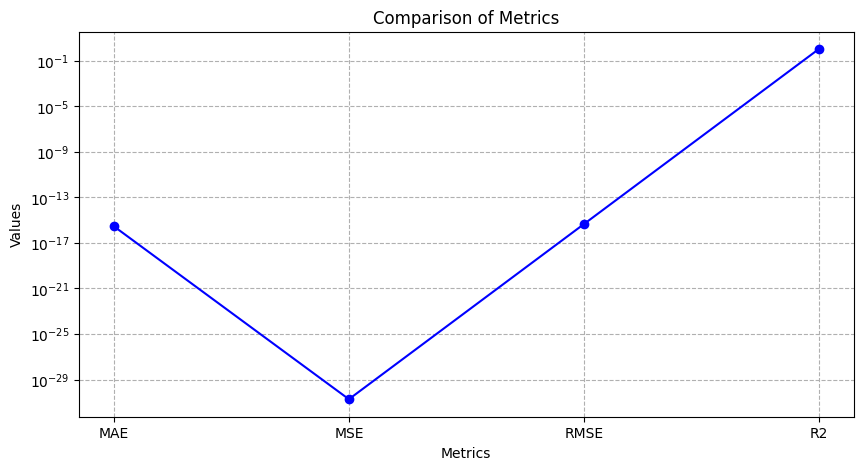

In [14]:
%pip install matplotlib
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]

plt.figure(figsize=(10, 5))
plt.plot(metrics, values, marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('Comparison of Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.yscale('log')  # Use logarithmic scale for better visualization of small values
plt.grid(True, which="both", ls="--")
plt.show()

Creates a line plot of performance metrics.

Uses logarithmic scale (plt.yscale('log')) to better display large and small values together.

***8. Printing Model Metrics***

In [15]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 2.7609670579083576e-16
MSE: 1.8654217790898838e-31
RMSE: 4.3190528812343614e-16
R2: 1.0


***Final Summary***

✅ Loads dataset : Get real-world housing price data.


✅ Preprocesses data : Select useful features and remove redundant ones.

✅ Splits it into training & testing sets : Evaluate model on unseen data to ensure generalization.

✅ Trains a linear regression model: Learn relationships between house prices and input features

✅ Makes predictions on test data : Use the trained model to estimate house prices.

✅ Evaluates the model using MAE, MSE, RMSE, and R² Score : Check how accurate predictions are using error metrics.

✅ Visualizes results using matplotlib : Understand how well the model performs.

👉 ***Linear Regression is used here because housing prices have a linear relationship with multiple factors, the model is simple, interpretable, and computationally efficient. However, if performance is not satisfactory, we may explore more complex models.***